In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.arange(0,1,0.02)
y = 0.7*X + 0.3

 

print("shape ox X = ",X.shape)
print("shape of y = ",y.shape)

shape ox X =  (50,)
shape of y =  (50,)


In [3]:
X = X.reshape(-1,1)

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state= 20)

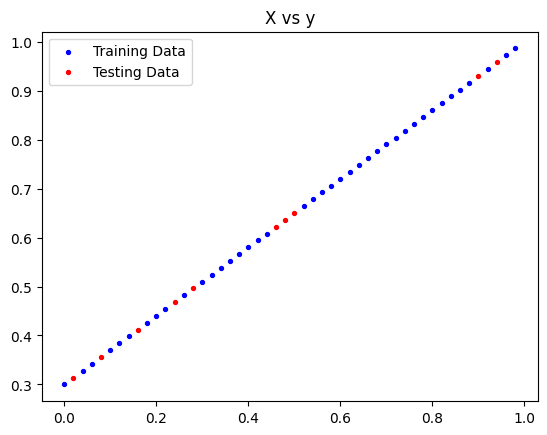

In [15]:
def plot_data(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,prediction=None):
    plt.Figure(figsize=(8,6))
    plt.scatter(X_train,y_train,c='b',s=8,label= "Training Data")
    plt.scatter(X_test,y_test,c='r',s=8,label= "Testing Data")
    if prediction is not None:
        plt.scatter(X_test,prediction,c='g',s=8,label="Predicted Data")
    plt.legend()
    plt.title("X vs y")
    plt.show()
    
plot_data()

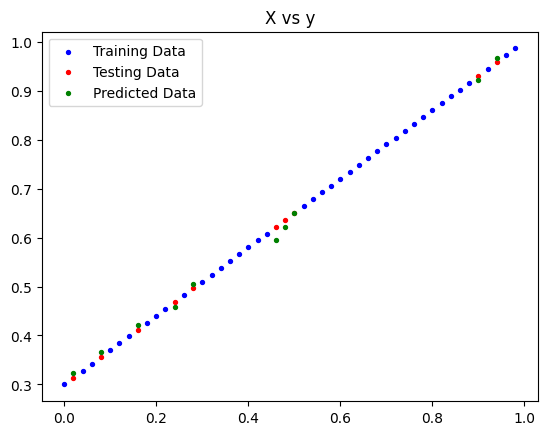

In [18]:
from sklearn.neighbors  import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train,y_train)
y_preds= knr.predict(X_test)
plot_data(prediction=y_preds)

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(f"MSE = {mean_squared_error(y_test,y_preds)}")
print(f"MAE = {mean_absolute_error(y_test,y_preds)}")
print(f"R^2 = {r2_score(y_test,y_preds)}")

MSE = 0.00015897777777777833
MAE = 0.010733333333333355
R^2 = 0.9964175119866123


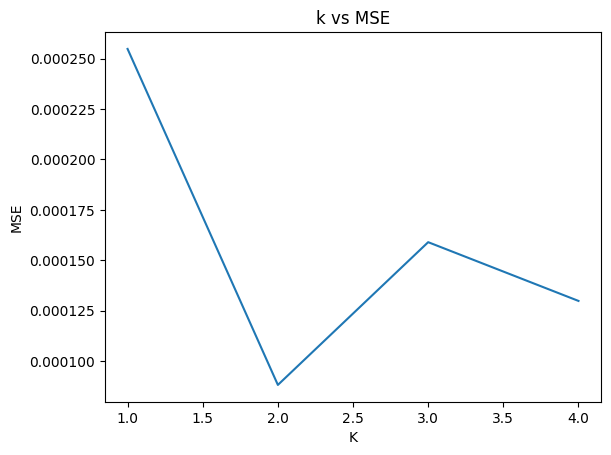

Best value of k =2


In [19]:
best_mse =[]

for k in range(1,5):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train,y_train)
    y_preds =knr.predict(X_test)
    best_mse.append(mean_squared_error(y_test,y_preds))

plt.plot(range(1,5),best_mse)
plt.title("k vs MSE")
plt.xlabel('K')
plt.ylabel("MSE")
plt.show()


best_k = range(1,5)[np.argmin(best_mse)]
print(f'Best value of k ={best_k}')


In [37]:
from sklearn.neighbors  import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train,y_train)
y_preds= knr.predict(X_test)
plot_data(predictions=y_preds)

TypeError: plot_data() got an unexpected keyword argument 'predictions'. Did you mean 'prediction'?

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1


In [23]:
X,y = make_friedman1(n_samples=10000,n_features=5,noise=1.0,random_state=42)


In [25]:
print(X.shape,y.shape)

(10000, 5) (10000,)


In [29]:
import pandas as pd

df = pd.DataFrame(X,columns=['X1','X2','X3','X4','X5'])
df['y']=y
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      10000 non-null  float64
 1   X2      10000 non-null  float64
 2   X3      10000 non-null  float64
 3   X4      10000 non-null  float64
 4   X5      10000 non-null  float64
 5   y       10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


,X1,X2,X3,X4,X5,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.501298,0.493237,0.499707,0.502962,0.497112,14.367141
std,0.289602,0.288447,0.288252,0.288039,0.287645,4.963603
min,0.000048,0.000006,0.000012,0.000110,0.000135,0.334713
25%,0.251798,0.241669,0.250482,0.252734,0.248530,10.831248
50%,0.499756,0.494714,0.498054,0.505929,0.495780,14.366941
75%,0.755352,0.738906,0.750048,0.750476,0.745750,17.865250
max,0.999805,0.999972,0.999957,0.999925,0.999673,30.230164


In [31]:
import pandas as pd

X = df.drop(columns=['y'])
y=df['y']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

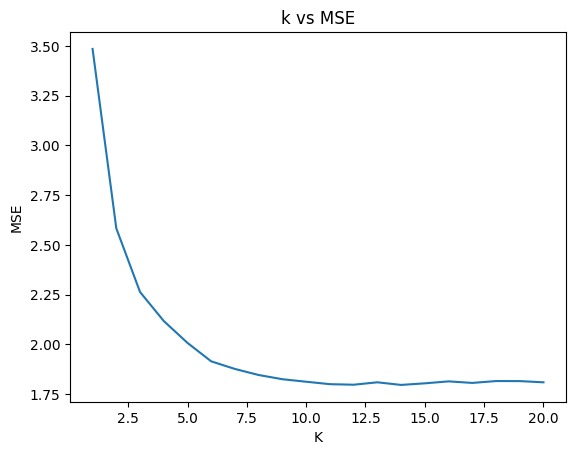

mse  : [3.484786894244056, 2.5830586454359525, 2.263132121896223, 2.117332586447737, 2.0072727396217336, 1.914568757961429, 1.8763473402404947, 1.8459519142354266, 1.8247858072818202, 1.8121588488737868, 1.7999177946082028, 1.7971818687658982, 1.8092888495005337, 1.7961373131389315, 1.804131593736653, 1.8139614777939737, 1.806205149430451, 1.8155560645952526, 1.8153155978805895, 1.8092302289399311]
Best value of k =14


In [ ]:
best_mse =[]

for k in range(1,21):
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_train,y_train)
    y_preds =knr.predict(X_test)
    best_mse.append(mean_squared_error(y_test,y_preds))

plt.plot(range(1,21),best_mse)
plt.title("k vs MSE")
plt.xlabel('K')
plt.ylabel("MSE")
plt.show()


best_k = range(1,21)[np.argmin(best_mse)]

print(f'Best value of k ={best_k}')


In [42]:
from sklearn.neighbors  import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=14)
knr.fit(X_train,y_train)
y_pred= knr.predict(X_test)

print(f"MSE = {mean_squared_error(y_test,y_pred)}")
print(f"MAE = {mean_absolute_error(y_test,y_pred)}")
print(f"R^2 = {r2_score(y_test,y_pred)}")

MSE = 1.7961373131389315
MAE = 1.0566121047544348
R^2 = 0.9251296575503287


In [ ]:
X,y = make_friedman1(n_samples=10000,n_features=5,noise=1.0,random_state=42)



In [45]:
from sklearn.neighbors  import KNeighborsRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred= dtr.predict(X_test)

print(f"MSE = {mean_squared_error(y_test,y_pred)}")
print(f"MAE = {mean_absolute_error(y_test,y_pred)}")
print(f"R^2 = {r2_score(y_test,y_pred)}")

MSE = 4.770337324850769
MAE = 1.705298440668008
R^2 = 0.801152848115015


In [47]:

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred= rfr.predict(X_test)

print(f"MSE = {mean_squared_error(y_test,y_pred)}")
print(f"MAE = {mean_absolute_error(y_test,y_pred)}")
print(f"R^2 = {r2_score(y_test,y_pred)}")

MSE = 1.9754848305344503
MAE = 1.093630781643329
R^2 = 0.9176537201892622


In [48]:

mlp = MLPRegressor(hidden_layer_sizes=[500,500,500,500],max_iter=2000)
mlp.fit(X_train,y_train)
y_pred= mlp.predict(X_test)

print(f"MSE = {mean_squared_error(y_test,y_pred)}")
print(f"MAE = {mean_absolute_error(y_test,y_pred)}")
print(f"R^2 = {r2_score(y_test,y_pred)}")

MSE = 1.0777934176656299
MAE = 0.8370510552000604
R^2 = 0.9550731663551908
